Try loops again.

In [1]:
# Cite:
# https://github.com/PharmCat/MvNormalCDF.jl

# Total cost:
# c_0_a^3 + m * c_res_a # Main results here
# c_0_a^4 + m * c_res_a

Revise: Check what would happen if we reduce the number of Consumers to 100 (same method in DVC_Clean_Julia01_experiment_v2.3).

Keep the parameters as 2 as before.

In [1]:
# import packages
using Distributions, Random, MvNormalCDF
using Query, Plots, StatsPlots
using DataFrames, CSV, Dates

Define the functions

In [2]:
# Example functions of deltap: from the investment to the value brought by the developers
## Linear

# function deltap_a(c_0_a) # original: 2
#     2 * c_0_a
# end

# function deltap_b(c_0_b)
#     2 * c_0_b
# end

## Quadratic

function deltap_a(c_0_a) # original: 2
    2 * c_0_a
end

function deltap_b(c_0_b)
    2 * c_0_b
end

deltap_b (generic function with 1 method)

In [3]:
# Example functionality of softwares

function theta_func(theta_1_bar_a, c_0_a)
    theta_1_bar_a + 2 * c_0_a
end    

theta_func (generic function with 1 method)

In [4]:
# Example utility function of customer

function util(u_bar_a, x_1, y_1, theta_1, c_0_a, p_s_a)
    u_bar_a + x_1 * theta_1 + y_1 * c_0_a - p_s_a
end

util (generic function with 1 method)

In [5]:
# Example total cost

function c_total_a(c_0_a, m, c_res_a)
    c_0_a^3 + m * c_res_a
end

# function c_total_a(c_0_a, m, c_res_a)
#     c_0_a^4 + m * c_res_a
# end

c_total_a (generic function with 1 method)

In [6]:
# Example functions of profits of owners (firms a and b)

function profit_a(m, price_s_a, c_0_a, c_res_a)
    m * price_s_a - c_0_a^3 - m * c_res_a
end

# function profit_a(m, price_s_a, c_0_a, c_res_a)
#     m * price_s_a - c_0_a^4 - m * c_res_a
# end

profit_a (generic function with 1 method)

Joint distribution of customers

In [7]:
# By now we assume that both follow normal distributions
# x ~ N(0.8, 0.05) # tbd: evidence?
# y ~ N(0, 0.05)
# Joint dist.: correlation = 0 # tbd: evidence?
# Draw the bivariate joint dist.
mu = [0.8; 0];
sigma = [0.05^2 0; 0 0.2^2];
dist01 = MvNormal(mu, sigma);

In [8]:
# Bivariate Normal dist.
a = [0; -1]
b = [1; 1]
# m: number of integration points (default 1000*dimension)
(p,e) = mvnormcdf(mu, sigma, a, b; m = 2000) # Multivariate Normal probability integral

(0.9999677554731808, 0.0)

In [9]:
# Sampling
Random.seed!(123);
rand_sample01 = rand(dist01,100)';
# rand_sample01 = rand(dist01,1000)'; # 1000; 100;

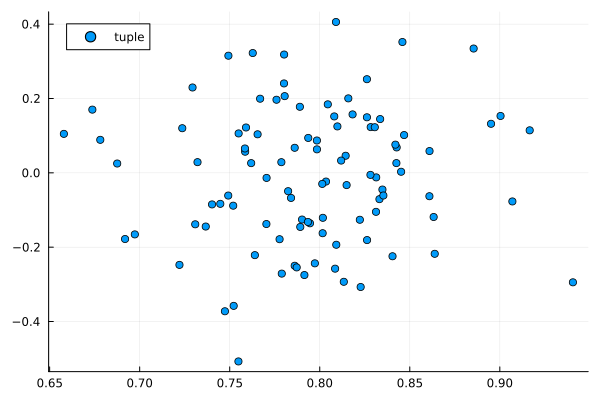

In [10]:
x = rand_sample01[:,1]
y = rand_sample01[:,2]
plot(x, y, seriestype=:scatter, label="tuple")

In [11]:
# Check range: should be restricted to the range [0,1] and [-1,1]
[minimum(x), maximum(x), minimum(y), maximum(y)]

4-element Vector{Float64}:
  0.6579027424502671
  0.940596384807489
 -0.5073372309626357
  0.4057822970905063

In [12]:
# Save the sample values
rand_sample01

100×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.840414  -0.224415
 0.744768  -0.0833985
 0.814379   0.0459637
 0.778912  -0.271118
 0.803473  -0.0234646
 0.860964   0.0585829
 0.798443   0.0631666
 0.691881  -0.178015
 0.842712   0.0683564
 0.784056  -0.0674909
 0.900406   0.153006
 0.809013   0.405782
 0.793618   0.0938954
 ⋮         
 0.793428  -0.132125
 0.732116   0.0287385
 0.747336  -0.372387
 0.749183  -0.0611277
 0.835332  -0.0609882
 0.758454   0.0655173
 0.811887   0.0330049
 0.940596  -0.294526
 0.801731  -0.120972
 0.787192  -0.254397
 0.754843  -0.507337
 0.79728   -0.243465

In [13]:
df_rand_sample01 = DataFrame(s = x, st_R = y)

Row,s,st_R
,Float64,Float64
1,0.840414,-0.224415
2,0.744768,-0.0833985
3,0.814379,0.0459637
4,0.778912,-0.271118
5,0.803473,-0.0234646
6,0.860964,0.0585829
7,0.798443,0.0631666
8,0.691881,-0.178015
9,0.842712,0.0683564


In [14]:
# CSV.write("C:\\Users\\zwang3\\Downloads\\rand_sample01_n_1000.csv", df_rand_sample01)
# CSV.write("rand_sample01_n_100.csv", df_rand_sample01)

Check the scenarios

In [31]:
# position01 = r"C:\Users\think\sciebo\Bounded Rationality\Digitalization_SC\Data Value Chain\Cross-border Data Flows\Selected Distributions and Sampling"

In [16]:
# rand_sample02_new_100 = CSV.read("C:\\Users\\think\\sciebo\\Bounded Rationality\\Digitalization_SC\\Data Value Chain\\Cross-border Data Flows\\Selected Distributions and Sampling\\rand_sample02_new_100.csv", DataFrame) # distribution 2
# rand_sample02_new_100 = CSV.read("C:\\Users\\think\\sciebo\\Bounded Rationality\\Digitalization_SC\\Data Value Chain\\Cross-border Data Flows\\Selected Distributions and Sampling\\rand_sample03_new_100.csv", DataFrame) # distribution 3
rand_sample02_new_100 = df_rand_sample01

Row,s,st_R
,Float64,Float64
1,0.840414,-0.224415
2,0.744768,-0.0833985
3,0.814379,0.0459637
4,0.778912,-0.271118
5,0.803473,-0.0234646
6,0.860964,0.0585829
7,0.798443,0.0631666
8,0.691881,-0.178015
9,0.842712,0.0683564


In [17]:
# CSV.read("C:\\Users\\zwang3\\Downloads\\rand_sample01_n_1000.csv", DataFrame) #; delim=","
# rand_sample02_new_100 = CSV.read("C:\\Users\\think\\Downloads\\rand_sample02_new_100.csv", DataFrame) # distribution 2
# rand_sample02_new_100 = CSV.read("C:\\Users\\think\\sciebo\\Bounded Rationality\\Digitalization_SC\\Data Value Chain\\Cross-border Data Flows\\Selected Distributions and Sampling\\rand_sample03_new_100.csv", DataFrame) # distribution 3
x = rand_sample02_new_100.s
y = rand_sample02_new_100.st_R

# One certain setup

# policy factor: data restriction
c_res_a = 5; c_res_b = 5

# cost of contract
c_0_a = 60; c_0_b = 60

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

# utility constant
u_bar_a = 100; u_bar_b = 100;

# number of customers
n_customers = 100;

# check Consumers' tastes
s = x; 
st_R = y;

# reserved utility
ru = 50; # homogenous

In [18]:
# One certain setup

# policy factor: data restriction
c_res_a = 5; c_res_b = 5

# cost of contract
c_0_a = 60; c_0_b = 60

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

# utility constant
u_bar_a = 100; u_bar_b = 100;

# number of customers
n_customers = 100;

In [19]:
# check Consumers' tastes
s = x; 
st_R = y;

# reserved utility
ru = 50; # homogenous

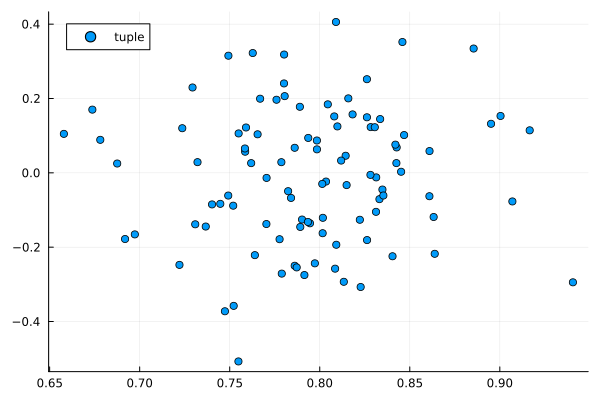

In [20]:
plot(x, y, seriestype=:scatter, label="tuple")

In [19]:
# above checked

Visualization of the equilibrium point.

In [60]:
n_customers

100

In [35]:
# c_res_a, c_res_b

Here we assume that the maximum investment an Owner can choose is 200.

In [199]:
# initial settings
# trial_new = [0 0 0 0 0 0 0 0 0 0]
price_a_set = []; price_b_set = [];
c_0_a_set = []; c_0_b_set = [];

# policy factor: data restriction
c_res_a = 10; c_res_b = 10;

co_a_range = 2; # 10
co_b_range = 2; # 10 

# cost of contract # adjust this
c_0_a = 0; 

for co_a in 0:0.5:co_a_range # shorten the step
# for co_a in 0.5:0.5:co_a_range # shorten the step

    c_0_a = co_a; 

#     for co_b in 0:0.5:co_b_range
    for co_b in (c_0_a+0.5):0.5:co_b_range # shorten the step
#     for co_b in (c_0_a+1):0.5:co_b_range # shorten the step    
#     for co_b in (c_0_a+0.5):0.5:(c_0_a+1) # shorten the step    
#     for co_b in 0:0.5:(co_a-0.5) # shorten the step 

        c_0_b = co_b; # 0, 50, 100, 150, 200, 250, 300

        # fundamental 
        theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

        # functionality
        theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a);
        theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b);

        Random.seed!(123);

        pricelist1 = []
        maxpricelist1 = [] # track the best response of b

        search_range = 200;

        for jj in 1:search_range # 100, 200

            price_s_a = jj # Under certain price jj, check the best response of b
            pricelist1 = []

            for ii in 1:search_range

                price_s_b = ii

                # Trial: Utility
                utili_a = []
                utili_b = []
                for i in 1:n_customers
                    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
                    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
                end

                # buy randomly from one company if the utilities are the same
                dist_bin = Binomial(1, 0.5); # (n,p)
                bin = rand(dist_bin, n_customers)'; #'

                # count the numbers of purchase: buy - from a; buy2 - from b;
                buy = []; buy2 = [];

                for j in 1:n_customers
                    if ru <= max(utili_a[j], utili_b[j])
                        if utili_a[j] > utili_b[j]
                            append!(buy, 1);
                        elseif utili_a[j] < utili_b[j]
                            append!(buy2, 1);
                        else
                            append!(buy, bin[j]);
                            append!(buy2, 1-bin[j]);
                        end
                    else
                    end
                end

                # Count the purchases
                append!(buy, 0) # get rid of Any([])
                append!(buy2, 0)

                m1 = sum(buy)
                m2 = sum(buy2)
                pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
                pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

                append!(pricelist1, pr2)

            end

            # Find which price could bring the maximum profit
            indx = minimum(findall(x -> x == maximum(pricelist1), pricelist1))
            append!(maxpricelist1, range(1, search_range)[indx]) # 100, 200

        end

        # Find the certain list

        # maxpricelist1 # set of the BR of b under different prices of a
        search_range2 = union(maxpricelist1) # the possible BR of b, duplicates in the list dropped

        Random.seed!(123);

        pricelist2 = []
        maxpricelist2 = [] # track the best response of b

        for jj in search_range2

            price_s_b = jj # Under certain price jj, check the best response of b
            pricelist2 = []

            for ii in 1:search_range

                price_s_a = ii

                # Trial: Utility
                utili_a = []
                utili_b = []
                for i in 1:n_customers
                    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
                    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
                end

                # buy randomly from one company if the utilities are the same
                dist_bin = Binomial(1, 0.5); # (n,p)
                bin = rand(dist_bin, n_customers)'; #'

                # count the numbers of purchase: buy - from a; buy2 - from b;
                buy = []; buy2 = [];

                for j in 1:n_customers
                    if ru <= max(utili_a[j], utili_b[j])
                        if utili_a[j] > utili_b[j]
                            append!(buy, 1);
                        elseif utili_a[j] < utili_b[j]
                            append!(buy2, 1);
                        else
                            append!(buy, bin[j]);
                            append!(buy2, 1-bin[j]);
                        end
                    else
                    end
                end

                # Count the purchases
                append!(buy, 0) # get rid of Any([])
                append!(buy2, 0)

                m1 = sum(buy)
                m2 = sum(buy2)
                pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
                pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

                append!(pricelist2, pr1)

            end

            # Find which price could bring the maximum profit
            indx = minimum(findall(x -> x == maximum(pricelist2), pricelist2))
            append!(maxpricelist2, range(1, search_range)[indx])

        end

        # Find the possible solutions 
        # maxpricelist2 # set of the BR of a under different prices of b

        tuple_b = tuple.(range(1, search_range, step = 1), maxpricelist1);
        tuple_a = tuple.(maxpricelist2, search_range2);

        # Find the same element of the vector: get the equilibrium prices (p_a*, p_b*)
        set00 = intersect(Set(tuple_a), Set(tuple_b));

        # Check the results under the equilibrium
        # for just in range(1,100):
        price_s_a = getfield.(set00, 1)[1]; price_s_b = getfield.(set00, 2)[1]; # derived from last step
        price_a_set = append!(price_a_set, price_s_a);
        price_b_set = append!(price_b_set, price_s_b);
        c_0_a_set = append!(c_0_a_set, c_0_a);
        c_0_b_set = append!(c_0_b_set, c_0_b);
        
    end
    
end

In [204]:
# Append the results in the table
c_0_a = c_0_a_set[1]; c_0_b = c_0_b_set[1]; 
price_s_a = price_a_set[1]; price_s_b = price_b_set[1];

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

profit_a_set = []; profit_b_set = []; agg_welfare_set = [];
    
for k in 1:50 # Taking average

    # buy randomly from one company if the utilities are the same
    Random.seed!(k);
    dist_bin = Binomial(1, 0.5); # (n,p)
    bin = rand(dist_bin, n_customers)'; #'

    # count the numbers of purchase: buy - from a; buy2 - from b;
    buy = []; buy2 = []; welf = []; 

    for j in range(1, n_customers)
        if ru <= max(utili_a[j], utili_b[j])
            if utili_a[j] > utili_b[j]
                append!(buy, 1);
                append!(welf, utili_a[j]);
            elseif utili_a[j] < utili_b[j]
                append!(buy2, 1);
                append!(welf, utili_b[j]);
            else
                append!(buy, bin[j]);
                append!(buy2, 1-bin[j]);
                append!(welf, utili_a[j]);
            end
        else
        end
    end

    # Count the purchases
    append!(buy, 0) # get rid of Any([])
    append!(buy2, 0)

    m1 = sum(buy);
    m2 = sum(buy2);

    # Objective functions regarding the global welfare
    agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
    agg_welfare = sum(welf) - agg_total_cost

    pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
    pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
    # total_pr = pr1 + pr2; 
    profit_a_set = append!(profit_a_set, pr1);
    profit_b_set = append!(profit_b_set, pr2);
    agg_welfare_set = append!(agg_welfare_set, agg_welfare);

end

pr1 = mean(profit_a_set); pr2 = mean(profit_b_set); 
total_pr = pr1 + pr2; agg_welfare = mean(agg_welfare_set);

In [207]:
trial0 = [c_res_a c_res_b c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]

1×12 Matrix{Float64}:
 10.0  10.0  0.0  0.5  10.0  10.0  0.0  100.0  0.0  -0.125  -0.125  8371.9

In [208]:
price_b_set

10-element Vector{Any}:
 10
 10
 13
 13
 10
 10
 13
 10
 10
 10

In [37]:
trial_new

7×10 Matrix{Float64}:
 0.0  0.0   0.0   0.0   0.0    0.0   0.0     0.0     0.0       0.0
 0.0  0.0  10.0  10.0  45.0   55.0   0.0     0.0     0.0    8054.84
 0.0  0.5  10.0  10.0   0.0  100.0   0.0    -0.125  -0.125  8133.36
 0.0  1.0   9.0  10.0   0.0  100.0   0.0    -1.0    -1.0    8211.87
 0.5  0.5  10.0  10.0  45.0   55.0  -0.125  -0.125  -0.25   8132.36
 0.5  1.0  10.0  10.0   0.0  100.0  -0.125  -1.0    -1.125  8210.87
 1.0  1.0  10.0  10.0  45.0   55.0  -1.0    -1.0    -2.0    8209.87

Check negative profits

In [39]:
## Deterministic

c_res_a = 10; c_res_b = 10; 
c_0_a = 1; c_0_b = 1;
price_s_a = 11; price_s_b = 11;

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

# buy randomly from one company if the utilities are the same
Random.seed!(1);
dist_bin = Binomial(1, 0.5); # (n,p)
bin = rand(dist_bin, n_customers)';

# count the numbers of purchase: buy - from a; buy2 - from b;
buy = []; buy2 = []; welf = [];

for j in range(1, n_customers)
    if ru <= max(utili_a[j], utili_b[j])
        if utili_a[j] > utili_b[j]
            append!(buy, 1);
            append!(welf, utili_a[j]);
        elseif utili_a[j] < utili_b[j]
            append!(buy2, 1);
            append!(welf, utili_b[j]);
        else
            append!(buy, bin[j]);
            append!(buy2, 1-bin[j]);
            append!(welf, utili_a[j]);
        end
    else
    end
end

# Count the purchases
append!(buy, 0) # get rid of Any([])
append!(buy2, 0)

m1 = sum(buy);
m2 = sum(buy2);

# Objective functions regarding the global welfare
agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
agg_welfare = sum(welf) - agg_total_cost

pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
total_pr = pr1 + pr2; 
    
trial0 = [c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]

1×10 Matrix{Float64}:
 1.0  1.0  11.0  11.0  39.0  61.0  38.0  60.0  98.0  8109.87

In [ ]:
trial_new0 = vcat(trial_new0, trial0)

In [141]:
# Symmetric case
# Find the Nash equil. prices under a pair of investments

c_0_a = 10;
c_0_b = c_0_a; # 0, 50, 100, 150, 200, 250, 300

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a);
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b);

# price vector for Owner b
search_range = 50;
prices = 1:search_range # price vector

profit_mat = []; # save the vectors of profit of b
eqil_prices = []; 

# buy randomly from one company if the utilities are the same
Random.seed!(1);
dist_bin = Binomial(1, 0.5); # (n,p)
bin = rand(dist_bin, n_customers)'; #'

for psa in prices

    for key in 1:10 # change the random seeds and see the profits

        # buy randomly from one company if the utilities are the same
        dist_bin = Binomial(1, 0.5); # (n,p)
        Random.seed!(key); # 8
        bin = rand(dist_bin, n_customers)'; #'

        # maxpricelist1 = [] # track the best response of b

        price_s_a = psa # Under certain price jj, check the best response of b
        pricelist1 = []

        for ii in 1:search_range 

            price_s_b = ii

            # Trial: Utility
            utili_a = []
            utili_b = []
            for i in 1:n_customers
                append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
                append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
            end

            # count the numbers of purchase: buy - from a; buy2 - from b;
            buy = []; buy2 = [];

            for j in 1:n_customers
                if ru <= max(utili_a[j], utili_b[j])
                    if utili_a[j] > utili_b[j]
                        append!(buy, 1);
                    elseif utili_a[j] < utili_b[j]
                        append!(buy2, 1);
                    else
                        append!(buy, bin[j]);
                        append!(buy2, 1-bin[j]);
                    end
                else
                end
            end

            # Count the purchases
            append!(buy, 0) # get rid of Any([])
            append!(buy2, 0)

            m1 = sum(buy)
            m2 = sum(buy2)
            pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
            pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

            append!(pricelist1, pr2) # 'pricelist1' means the profit of b

        end

        # Save the price list and the corresponding profit list
        profit_mat = [profit_mat; [pricelist1]]

    end

    # save Nash eqil prices
    profit_mat_sum = sum(profit_mat); # sum of the profits under prices
    vec_argmax = findall(x -> x == maximum(profit_mat_sum), profit_mat_sum)

    # for symmetric cases
    if price_s_a in vec_argmax
        append!(eqil_prices, price_s_a)
    else
    end

end

In [142]:
eqil_prices

2-element Vector{Any}:
 10
 11

In [192]:
# Find the profits of the equilibrium

profit_mean_set = [] # Which equilibrium to go to

for m in 1:length(eqil_prices)
    
    price_s_a = eqil_prices[m]; price_s_b = price_s_a;

    utili_a = []
    utili_b = []
    for i in 1:n_customers
        append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
        append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
    end

    profit_a_set = []; profit_b_set = []; agg_welfare_set = [];

    # change the random seed and see the average profit under each equilibrium price pair (p^*_a, p^*_b)
    for k in 1:50 # Simulations of different random seeds: Take the average

        # buy randomly from one company if the utilities are the same
        Random.seed!(k);
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)'; #'    

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = [];

        for j in 1:n_customers
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy)
        m2 = sum(buy2)
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)
        profit_a_set = append!(profit_a_set, pr1)
        profit_b_set = append!(profit_b_set, pr2)

        # Objective functions regarding the global welfare
        agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
        agg_welfare = sum(welf) - agg_total_cost;
        agg_welfare_set = append!(agg_welfare_set, agg_welfare);

    end

    profit_mean_set = append!(profit_mean_set, mean([mean(profit_a_set) mean(profit_b_set)])) 

end

In [193]:
# Find which price could bring the maximum profit
indx = minimum(findall(x -> x == maximum(profit_mean_set), profit_mean_set));
eqil_prices[indx]

11

In [196]:
# Append the results in the table
price_s_a = eqil_prices[indx]; price_s_b = price_s_a;

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

profit_a_set = []; profit_b_set = []; agg_welfare_set = [];
    
for k in 1:50 # Taking average

    # buy randomly from one company if the utilities are the same
    Random.seed!(k);
    dist_bin = Binomial(1, 0.5); # (n,p)
    bin = rand(dist_bin, n_customers)'; #'

    # count the numbers of purchase: buy - from a; buy2 - from b;
    buy = []; buy2 = []; welf = []; 

    for j in range(1, n_customers)
        if ru <= max(utili_a[j], utili_b[j])
            if utili_a[j] > utili_b[j]
                append!(buy, 1);
                append!(welf, utili_a[j]);
            elseif utili_a[j] < utili_b[j]
                append!(buy2, 1);
                append!(welf, utili_b[j]);
            else
                append!(buy, bin[j]);
                append!(buy2, 1-bin[j]);
                append!(welf, utili_a[j]);
            end
        else
        end
    end

    # Count the purchases
    append!(buy, 0) # get rid of Any([])
    append!(buy2, 0)

    m1 = sum(buy);
    m2 = sum(buy2);

    # Objective functions regarding the global welfare
    agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
    agg_welfare = sum(welf) - agg_total_cost

    pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
    pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
    # total_pr = pr1 + pr2; 
    profit_a_set = append!(profit_a_set, pr1);
    profit_b_set = append!(profit_b_set, pr2);
    agg_welfare_set = append!(agg_welfare_set, agg_welfare);

end

pr1 = mean(profit_a_set); pr2 = mean(profit_b_set); 
total_pr = pr1 + pr2; agg_welfare = mean(agg_welfare_set);

trial0 = [c_res_a c_res_b c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]

1×12 Matrix{Float64}:
 10.0  10.0  10.0  10.0  11.0  11.0  …  -949.48  -950.52  -1900.0  9505.11

In [164]:
profit_a_set

5000-element Vector{Any}:
   -961
   -922
   -883
   -844
   -805
   -766
   -727
   -688
   -649
   -610
   -571
   -532
   -493
      ⋮
 193571
 193610
 193649
 193688
 193727
 193766
 193805
 193844
 193883
 193922
 193961
 194000

In [198]:
price_s_a

50

In [136]:


pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
total_pr = pr1 + pr2; 
    
trial0 = [c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]

(-1000, -1000)

In [ ]:
trial_new = [0 0 0 0 0 0 0 0 0 0 0 0]


In [111]:


profit_a(m1, price_s_a, c_0_a, c_res_a)
trial = [c_res_a c_res_b c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]
trial_new = vcat(trial_new, trial)

1000

In [95]:
profit_mat[1]

50-element Vector{Any}:
 -1549
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
     ⋮
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000

In [63]:
vec01 = pricelist1; # price_b from 1 to 50

In [68]:
pricelist1 == vec01

true

In [75]:
bin = rand(dist_bin, n_customers)'

1×100 adjoint(::Vector{Int64}) with eltype Int64:
 1  0  1  0  0  0  0  0  1  1  1  0  0  …  1  1  0  0  1  0  1  1  1  0  1  0

In [79]:
elsa = [bin];
[elsa; elsa]

2-element Vector{LinearAlgebra.Adjoint{Int64, Vector{Int64}}}:
 [1 0 … 1 0]
 [1 0 … 1 0]

1:50

In [53]:
trial_values = trial_new
df_equil_new001 = DataFrame(c_0_a = trial_values[:, 1], c_0_b = trial_values[:, 2],
    price_s_a = trial_values[:, 3], price_s_b = trial_values[:, 4],
    m1 = trial_values[:, 5], m2 = trial_values[:, 6],
    pr1 = trial_values[:, 7], pr2 = trial_values[:, 8],
    total_pr = trial_values[:, 9], agg_welfare = trial_values[:, 10])

Row,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,10.0,10.0,45.0,55.0,0.0,0.0,0.0,8529.43
3,0.0,0.5,10.0,10.0,0.0,100.0,0.0,-0.125,-0.125,8578.79
4,0.0,1.0,10.0,11.0,44.0,56.0,0.0,55.0,55.0,8532.2
5,0.0,1.5,9.0,10.0,0.0,100.0,0.0,-3.375,-3.375,8677.52
6,0.0,2.0,10.0,12.0,44.0,56.0,0.0,104.0,104.0,8534.97
7,0.0,2.5,11.0,13.0,6.0,94.0,6.0,266.375,272.375,8476.78
8,0.0,3.0,10.0,12.0,0.0,100.0,0.0,173.0,173.0,8625.61
9,0.0,3.5,10.0,13.0,11.0,89.0,0.0,224.125,224.125,8577.18


In [55]:
# CSV.write("C:\\Users\\zwang3\\Downloads\\df_equil_new002_0710_res_0_10_r13.csv", df_equil_new001) # tbd: save!
# CSV.write("df_equil_new002_0731_4thorder_res_0_10_r3.csv", df_equil_new001)

# CSV.write("df_equil_new2_results00.csv", df_equil_new001)
# CSV.write("df_equil_new2_results00_res_10_10.csv", df_equil_new001)
# CSV.write("df_equil_new2_results00_res_0_10.csv", df_equil_new001)
# CSV.write("df_equil_new3_results00_res_0_10.csv", df_equil_new001)
# CSV.write("df_equil_new3_results00_res_0_0.csv", df_equil_new001)
# CSV.write("df_equil_new3_results00_res_10_10.csv", df_equil_new001) # ready

"df_equil_new3_results00_res_10_10.csv"

In [31]:
# trial_values

In [ ]:
# checked 01!!

In [77]:
timest2 = now() # estimate the run time: 100 Consumers, not even one minute!
timest2 - timest1 # next: 70, 100

20112 milliseconds

In [227]:
# trial

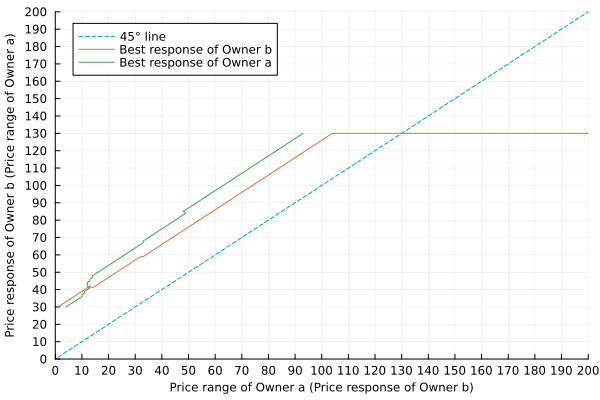

In [211]:
plot(1:200, 1:200, label = "45° line", ls=:dash) # , aspect_ratio = 1
xlabel!("Price range of Owner a (Price response of Owner b)")
ylabel!("Price response of Owner b (Price range of Owner a)")
plot!(xlabelfontsize=8, ylabelfontsize=8)
plot!(range(1, search_range, step = 1), maxpricelist1, label = "Best response of Owner b", lw=1)
plot!(maxpricelist2, search_range2, label = "Best response of Owner a", lw=1)
xlims!(0, 200)
ylims!(0, 200)
xticks!(0:10:200)
yticks!(0:10:200)

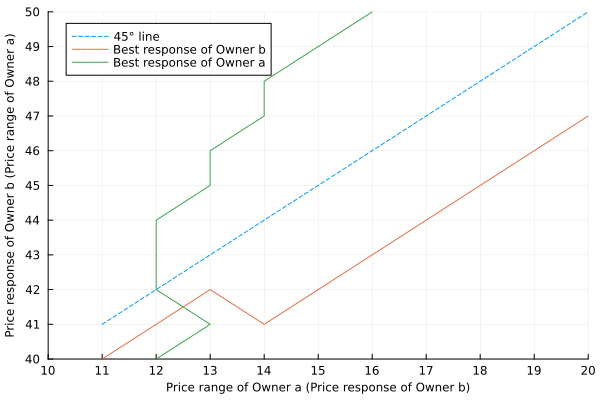

In [212]:
plot(11:20, 41:50, label = "45° line", ls=:dash) # , aspect_ratio = 1
xlabel!("Price range of Owner a (Price response of Owner b)")
ylabel!("Price response of Owner b (Price range of Owner a)")
plot!(xlabelfontsize=8, ylabelfontsize=8)
plot!(range(1, search_range, step = 1), maxpricelist1, label = "Best response of Owner b", lw=1)
plot!(maxpricelist2, search_range2, label = "Best response of Owner a", lw=1)
xlims!(10, 20)
ylims!(40, 50)
xticks!(10:1:20)
yticks!(40:1:50)

In [140]:
price_s_a, price_s_b

(10, 10)

Calculating the Nash Equilibrium

In [109]:
# price_s_a = 12.5; price_s_b = 41.5;
# price_s_a = 13.5; price_s_b = 56.5;
# price_s_a = 14.5; price_s_b = 71.5;
# price_s_a = 15.5; price_s_b = 87.5;
# price_s_a = 16.5; price_s_b = 102.5;
# price_s_a, price_s_b
# n_customers = 100
# trial_new
# initial settings
trial_new = [0 0 0 0 0 0 0 0 0 0 0 0]

1×12 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0

In [122]:
# Conditions000
c_res_a = 10; c_res_b = 10;

c_0_a = 4.8; c_0_b = 1.8;

# fundamental 
theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8

# functionality
theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a);
theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b);

Random.seed!(123);

pricelist1 = []
maxpricelist1 = [] # track the best response of b

search_range = 200;

for jj in 1:search_range # 100, 200

    price_s_a = jj # Under certain price jj, check the best response of b
    pricelist1 = []

    for ii in 1:search_range

        price_s_b = ii

        # Trial: Utility
        utili_a = []
        utili_b = []
        for i in 1:n_customers
            append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
            append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
        end

        # buy randomly from one company if the utilities are the same
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)';

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = [];

        for j in 1:n_customers
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy)
        m2 = sum(buy2)
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

        append!(pricelist1, pr2)

    end

    # Find which price could bring the maximum profit
    indx = minimum(findall(x -> x == maximum(pricelist1), pricelist1))
    append!(maxpricelist1, range(1, search_range)[indx]) # 100, 200

end

# Find the certain list

# maxpricelist1 # set of the BR of b under different prices of a
search_range2 = union(maxpricelist1) # the possible BR of b, duplicates in the list dropped

Random.seed!(123);

pricelist2 = []
maxpricelist2 = [] # track the best response of b

for jj in search_range2

    price_s_b = jj # Under certain price jj, check the best response of b
    pricelist2 = []

    for ii in 1:search_range

        price_s_a = ii

        # Trial: Utility
        utili_a = []
        utili_b = []
        for i in 1:n_customers
            append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
            append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
        end

        # buy randomly from one company if the utilities are the same
        dist_bin = Binomial(1, 0.5); # (n,p)
        bin = rand(dist_bin, n_customers)';

        # count the numbers of purchase: buy - from a; buy2 - from b;
        buy = []; buy2 = [];

        for j in 1:n_customers
            if ru <= max(utili_a[j], utili_b[j])
                if utili_a[j] > utili_b[j]
                    append!(buy, 1);
                elseif utili_a[j] < utili_b[j]
                    append!(buy2, 1);
                else
                    append!(buy, bin[j]);
                    append!(buy2, 1-bin[j]);
                end
            else
            end
        end

        # Count the purchases
        append!(buy, 0) # get rid of Any([])
        append!(buy2, 0)

        m1 = sum(buy)
        m2 = sum(buy2)
        pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a)
        pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b)

        append!(pricelist2, pr1)

    end

    # Find which price could bring the maximum profit
    indx = minimum(findall(x -> x == maximum(pricelist2), pricelist2))
    append!(maxpricelist2, range(1, search_range)[indx])

end

# Find the possible solutions 
# maxpricelist2 # set of the BR of a under different prices of b

tuple_b = tuple.(range(1, search_range, step = 1), maxpricelist1);
tuple_a = tuple.(maxpricelist2, search_range2);

# Find the same element of the vector: get the equilibrium prices (p_a*, p_b*)
set00 = intersect(Set(tuple_a),Set(tuple_b));

# Check the results under the equilibrium
# for just in range(1,100):
price_s_a = getfield.(set00, 1)[1]; price_s_b = getfield.(set00, 2)[1]; # derived from last step

Random.seed!(123);

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

# buy randomly from one company if the utilities are the same
dist_bin = Binomial(1, 0.5); # (n,p)
bin = rand(dist_bin, n_customers)';

# count the numbers of purchase: buy - from a; buy2 - from b;
buy = []; buy2 = []; welf = [];

for j in range(1, n_customers)
    if ru <= max(utili_a[j], utili_b[j])
        if utili_a[j] > utili_b[j]
            append!(buy, 1);
            append!(welf, utili_a[j]);
        elseif utili_a[j] < utili_b[j]
            append!(buy2, 1);
            append!(welf, utili_b[j]);
        else
            append!(buy, bin[j]);
            append!(buy2, 1-bin[j]);
            append!(welf, utili_a[j]);
        end
    else
    end
end

# Count the purchases
append!(buy, 0) # get rid of Any([])
append!(buy2, 0)

m1 = sum(buy);
m2 = sum(buy2);

# Objective functions regarding the global welfare
agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
agg_welfare = sum(welf) - agg_total_cost

pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
total_pr = pr1 + pr2; 

# c_0_a, c_0_b, m1, m2, pr1, pr2, total_pr, agg_welfare

trial = [c_res_a c_res_b c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]
trial_new = vcat(trial_new, trial)

14×12 Matrix{Float64}:
  0.0   0.0  0.0  0.0   0.0   0.0  …    0.0      0.0      0.0        0.0
  0.0   0.0  0.5  5.0   1.0   5.0      12.875  310.0    322.875  10037.5
  0.0   0.0  5.0  0.5   5.0   1.0     310.0     12.875  322.875  10037.5
  0.0   0.0  1.2  5.6   1.0   5.0      14.272  244.384  258.656  10096.6
  0.0   0.0  3.6  3.6   1.0   1.0      -1.656    8.344    6.688  10288.5
  0.0   0.0  5.6  1.2   5.0   1.0  …  244.384   14.272  258.656  10096.6
  0.0  10.0  5.5  0.0  10.0  11.0     753.625    8.0    761.625   9507.69
  0.0  10.0  6.0  0.5  10.0  11.0     704.0      7.875  711.875   9556.06
  0.0  10.0  5.6  0.5   9.0  11.0     697.384    2.875  700.259   9663.01
 10.0  10.0  0.5  6.0  11.0  16.0      15.875  288.0    303.875   8528.05
 10.0  10.0  6.0  0.5  16.0  11.0  …  288.0     15.875  303.875   8528.05
 10.0  10.0  1.8  4.8  10.0  12.0      -5.832   89.408   83.576   8799.72
 10.0  10.0  3.9  3.9  11.0  11.0     -14.319   -4.319  -18.638   8806.66
 10.0  10.0  4.8  1.8

In [123]:
trial_values = trial_new
df_equil_new001 = DataFrame(c_res_a = trial_values[:, 1], c_res_b = trial_values[:, 2], 
    c_0_a = trial_values[:, 3], c_0_b = trial_values[:, 4],
    price_s_a = trial_values[:, 5], price_s_b = trial_values[:, 6],
    m1 = trial_values[:, 7], m2 = trial_values[:, 8],
    pr1 = trial_values[:, 9], pr2 = trial_values[:, 10],
    total_pr = trial_values[:, 11], agg_welfare = trial_values[:, 12])

Row,c_res_a,c_res_b,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.5,5.0,1.0,5.0,13.0,87.0,12.875,310.0,322.875,10037.5
3,0.0,0.0,5.0,0.5,5.0,1.0,87.0,13.0,310.0,12.875,322.875,10037.5
4,0.0,0.0,1.2,5.6,1.0,5.0,16.0,84.0,14.272,244.384,258.656,10096.6
5,0.0,0.0,3.6,3.6,1.0,1.0,45.0,55.0,-1.656,8.344,6.688,10288.5
6,0.0,0.0,5.6,1.2,5.0,1.0,84.0,16.0,244.384,14.272,258.656,10096.6
7,0.0,10.0,5.5,0.0,10.0,11.0,92.0,8.0,753.625,8.0,761.625,9507.69
8,0.0,10.0,6.0,0.5,10.0,11.0,92.0,8.0,704.0,7.875,711.875,9556.06
9,0.0,10.0,5.6,0.5,9.0,11.0,97.0,3.0,697.384,2.875,700.259,9663.01


In [124]:
CSV.write("df_equil_new003_res_new_equil_results.csv", df_equil_new001)

"df_equil_new003_res_new_equil_results.csv"

In [130]:
# 0.5*(-58.8-48.8) #53.8
# 0.5*(17+27) # 22
# 0.5*(-1.7+8.3) # 3.3
# 0.5*(-14.3-4.3) # -9.3

-9.3

In [58]:
# Under the equilibrium prices

c_res_a = 0; c_res_b = 10;

# #!!!!!!

c_0_a = 5.5; c_0_b = 0.5;
# theta_1_bar_a_value = 0.8; theta_1_bar_b_value = 0.8
# theta_1_value_a = theta_func(theta_1_bar_a_value, c_0_a)
# theta_1_value_b = theta_func(theta_1_bar_b_value, c_0_b)

# price_s_a = 1; price_s_b = 1;

Random.seed!(123);

# Trial: Utility
utili_a = []
utili_b = []
for i in range(1, n_customers)
    append!(utili_a, util(u_bar_a, s[i], st_R[i], theta_1_value_a, c_res_a, price_s_a))
    append!(utili_b, util(u_bar_b, s[i], st_R[i], theta_1_value_b, c_res_b, price_s_b))
end

# buy randomly from one company if the utilities are the same
dist_bin = Binomial(1, 0.5); # (n,p)
bin = rand(dist_bin, n_customers)';

# count the numbers of purchase: buy - from a; buy2 - from b;
buy = []; buy2 = []; welf = [];

for j in range(1, n_customers)
    if ru <= max(utili_a[j], utili_b[j])
        if utili_a[j] > utili_b[j]
            append!(buy, 1);
            append!(welf, utili_a[j]);
        elseif utili_a[j] < utili_b[j]
            append!(buy2, 1);
            append!(welf, utili_b[j]);
        else
            append!(buy, bin[j]);
            append!(buy2, 1-bin[j]);
            append!(welf, utili_a[j]);
        end
    else
    end
end

# Count the purchases
append!(buy, 0) # get rid of Any([])
append!(buy2, 0)

m1 = sum(buy);
m2 = sum(buy2);

# Objective functions regarding the global welfare
agg_total_cost = deltap_a(c_0_a) + m1 * c_res_a + deltap_a(c_0_b) + m2 * c_res_b
agg_welfare = sum(welf) - agg_total_cost

pr1 = profit_a(m1, price_s_a, c_0_a, c_res_a);
pr2 = profit_a(m2, price_s_b, c_0_b, c_res_b);
total_pr = pr1 + pr2; 

# c_0_a, c_0_b, m1, m2, pr1, pr2, total_pr, agg_welfare
trial_new = [c_0_a c_0_b price_s_a price_s_b m1 m2 pr1 pr2 total_pr agg_welfare]
# trial_new = vcat(trial_new, trial)

LoadError: UndefVarError: price_s_a not defined

In [80]:
profit_a(m2, price_s_b, c_0_b, c_res_b)

-48.82300000000002

In [79]:
price_s_a

1

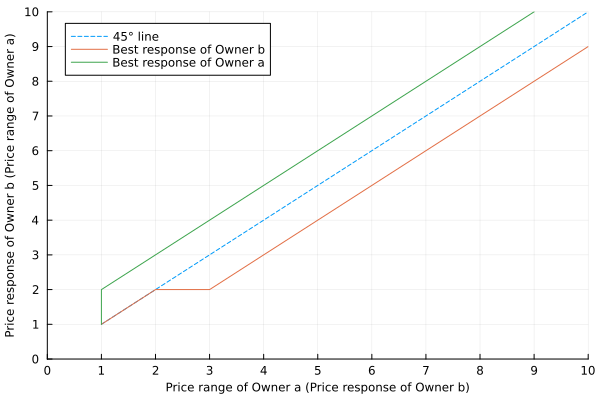

In [76]:
plot(1:10, 1:10, label = "45° line", ls=:dash) # , aspect_ratio = 1
xlabel!("Price range of Owner a (Price response of Owner b)")
ylabel!("Price response of Owner b (Price range of Owner a)")
plot!(xlabelfontsize=8, ylabelfontsize=8)
plot!(range(1, search_range, step = 1), maxpricelist1, label = "Best response of Owner b", lw=1)
plot!(maxpricelist2, search_range2, label = "Best response of Owner a", lw=1)
xlims!(0, 10)
ylims!(0, 10)
xticks!(0:1:10)
yticks!(0:1:10)

In [74]:
# trial = trial_new
trial = vcat(trial, trial_new)

9×10 Matrix{Float64}:
 0.0  0.0  1.0   1.0  45.0   55.0  45.0   55.0  100.0   9963.61
 0.0  1.0  1.0   2.0   0.0  100.0   0.0  199.0  199.0  10020.6
 0.0  2.0  1.0   4.0  17.0   83.0  17.0  324.0  341.0   9979.9
 0.0  3.0  1.0   5.0   1.0   99.0   1.0  468.0  469.0  10034.7
 0.0  4.0  1.0   6.0   0.0  100.0   0.0  536.0  536.0  10091.7
 0.0  5.0  1.0   8.0   6.0   94.0   6.0  627.0  633.0  10049.9
 0.0  6.0  1.0   9.0   1.0   99.0   1.0  675.0  676.0  10105.9
 0.0  7.0  1.0  11.0   6.0   94.0   6.0  691.0  697.0  10065.6
 0.0  8.0  1.0  12.0   3.0   97.0   3.0  652.0  655.0  10120.7

In [26]:
trial_values = trial
df_equil_new001 = DataFrame(c_0_a = trial_values[:, 1], c_0_b = trial_values[:, 2],
    price_s_a = trial_values[:, 3], price_s_b = trial_values[:, 4],
    m1 = trial_values[:, 5], m2 = trial_values[:, 6],
    pr1 = trial_values[:, 7], pr2 = trial_values[:, 8],
    total_pr = trial_values[:, 9], agg_welfare = trial_values[:, 10])

Row,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,1.0,1.0,45.0,55.0,45.0,55.0,100.0,9963.61


In [241]:
CSV.write("C:\\Users\\zwang3\\Downloads\\df_equil_new002_0630_res_10_10.csv", df_equil_new001) # tbd: save!

"C:\\Users\\zwang3\\Downloads\\df_equil_new002_0630_res_10_10.csv"